In [16]:
#Data Preparation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('../Assignment_data/Data_Q3/D40.csv')
data.head() # The data contains 10 attributes

,Unnamed: 0,1,2,3,4,5,6,7,8,9
0,0,0.013409,0.014208,0.007272,0.022528,0.021640,0.003984,0.968127,0.000000,1
1,1,0.033941,0.032394,0.013957,0.009382,0.056784,0.000000,0.896414,0.023904,1
2,2,0.024826,0.016694,0.010657,0.006108,0.010441,0.000000,1.000000,0.000000,1
3,3,0.013235,0.008512,0.004536,0.009924,0.008956,0.000000,1.000000,0.007968,1
4,4,0.021368,0.015708,0.006477,0.009855,0.022992,0.000000,1.000000,0.000000,1


In [17]:
data.info()
'''The dataset contains 2254 rows(instances).There are no null values.Unnamed:0 column is the serial number attribute and the
   the last column ('9') has only two values 1,0.All other attributes have float values.
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2254 entries, 0 to 2253
Data columns (total 10 columns):
Unnamed: 0    2254 non-null int64
1             2254 non-null float64
2             2254 non-null float64
3             2254 non-null float64
4             2254 non-null float64
5             2254 non-null float64
6             2254 non-null float64
7             2254 non-null float64
8             2254 non-null float64
9             2254 non-null int64
dtypes: float64(8), int64(2)
memory usage: 176.2 KB


"The dataset contains 2254 rows(instances).There are no null values.Unnamed:0 column is the serial number attribute and the\n   the last column ('9') has only two values 1,0.All other attributes have float values.\n"

In [18]:
data["9"].value_counts() #The data has two classes - 0 and 1.

1    1802
0     452
Name: 9, dtype: int64

In [19]:
data.describe()
'''The column Unnamed:0 has the serial number.
All the attributes take positive values.'''

'The column Unnamed:0 has the serial number.\nAll the attributes take positive values.'

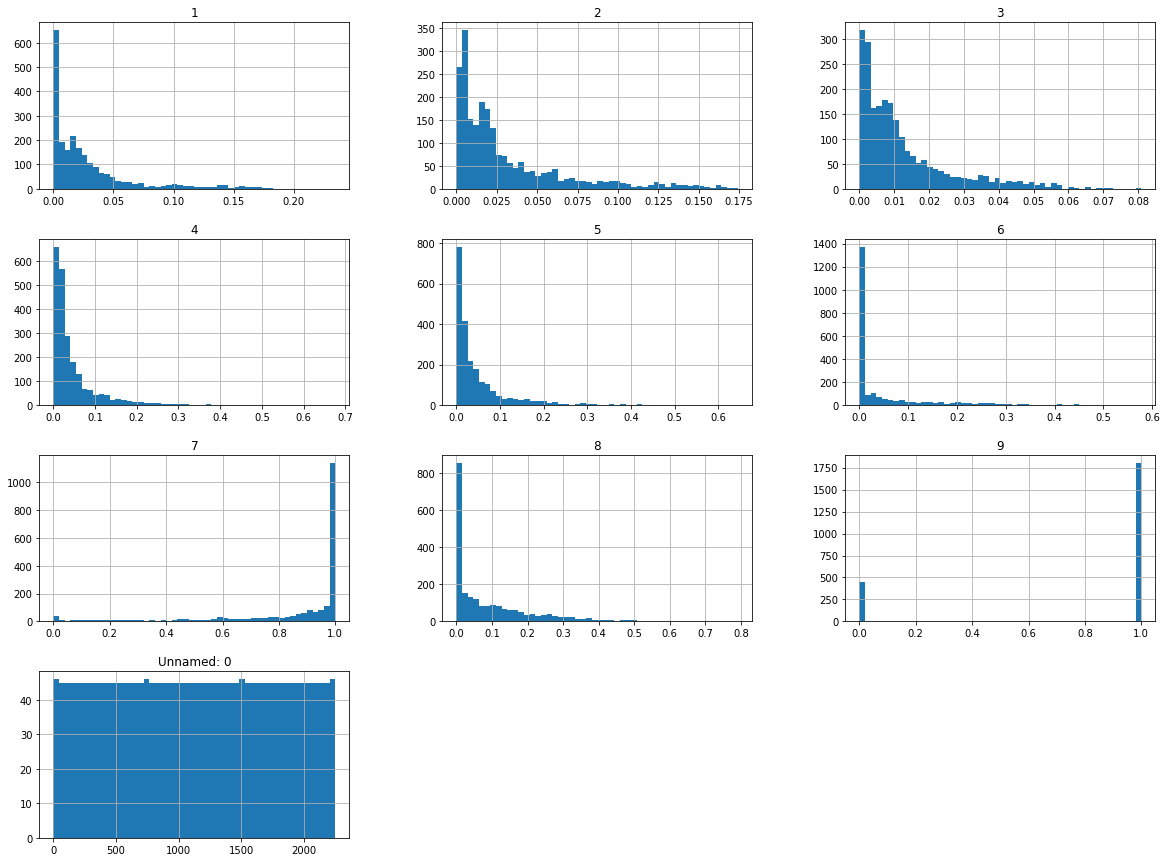

In [20]:
data.hist(bins=50, figsize=(20,15))
plt.show()
#Histograms of all the attributes of the dataset

In [21]:
#We can drop the first column (Unnamed:0) since it is just the serial numbers
data1 = data.drop(["Unnamed: 0","9"],axis=1)
labels = data["9"]
corr_matrix = data1.corr()
corr_matrix
#correlation matrix

,1,2,3,4,5,6,7,8
1,1.000000,0.923179,0.936892,0.558479,0.560025,0.335002,-0.446284,0.284476
2,0.923179,1.000000,0.925403,0.553268,0.495780,0.309533,-0.503592,0.262611
3,0.936892,0.925403,1.000000,0.511949,0.506885,0.296677,-0.459527,0.275214
4,0.558479,0.553268,0.511949,1.000000,0.663467,0.447808,-0.338741,0.341691
5,0.560025,0.495780,0.506885,0.663467,1.000000,0.486263,-0.253466,0.445038
6,0.335002,0.309533,0.296677,0.447808,0.486263,1.000000,-0.075558,0.481211
7,-0.446284,-0.503592,-0.459527,-0.338741,-0.253466,-0.075558,1.000000,-0.028101
8,0.284476,0.262611,0.275214,0.341691,0.445038,0.481211,-0.028101,1.000000


/home/niharika/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4fba070ef0>,
      dtype=object)

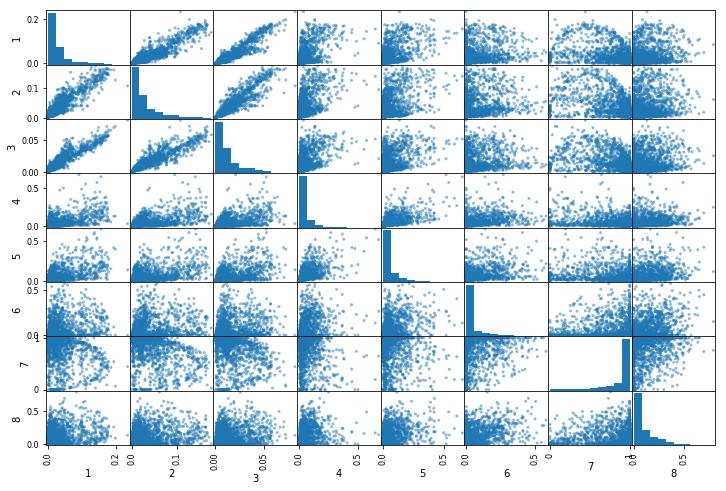

In [22]:
from pandas.tools.plotting import scatter_matrix
attributes = ["1","2","3","4","5","6","7","8"]
scatter_matrix(data1[attributes], figsize=(12, 8))
#Plots of correlation between the attributes

In [23]:
from sklearn.preprocessing import scale
from sklearn import preprocessing

#used for scaling the data
def scale_data(trainset):
    trainset = preprocessing.normalize(trainset)
    X_train_scale = scale(trainset)
    return X_train_scale

In [24]:
#Preprocessing the data
#Split the data into test and train data
from sklearn.model_selection import train_test_split  #Splitting the data into test and train data.
from sklearn.preprocessing import Imputer

dataset = data.drop(["Unnamed: 0"],axis=1)
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)

#Cleaning the train data

train_data = train_set.drop(["9"],axis=1)
train_labels = pd.DataFrame(train_set["9"])

imputer = Imputer(strategy="median")
imputer.fit(train_data)
train_X = imputer.transform(train_data)

#cleaning the test data

test_data = np.array(test_set.drop(["9"],axis=1))
test_labels = pd.DataFrame(test_set["9"])#data1 = pd.DataFrame(X1, columns=X1.columns, index = list(X1.index.values))
imputer.fit(test_data)
test_X = imputer.transform(test_data)

#Scaling the test and train data
train_X = scale_data(train_X)
test_X = scale_data(test_X)

In [25]:
#concatenating 1 at the start 
train_X1 = np.c_[np.ones((len(train_labels),1)),train_X]
test_X1=np.c_[np.ones((len(test_labels),1)),test_X]

In [26]:
#sigmoid function
def sigmoid(a):
    return (1.0 / (1 + np.exp(-a)))

In [27]:
#cost function
def cost(x1, y, theta):
    m= train_X1.shape[0]
    h = sigmoid(np.dot(x1, theta))
    cost = (np.dot(-y.T, np.log(h)) - np.dot((1 -y.T), np.log(1 - h)))/m
    return cost

In [28]:
def gradient_Descent(theta,alpha, x1 , y):
    m =train_X1.shape[0]
    h = sigmoid(np.dot(x1,theta))
    #print h
    grad = np.dot(x1.T, (h-y)) / m;#derivative of cost function
    Theta = theta - (alpha * grad)#Theta_new=Theta_old-eta*gradient
    return Theta

In [29]:
%%time
n_iterations =100
learning_rate = 0.5
dim = len(np.array(train_data)[0]) + 1
Theta=np.zeros((dim,1))

for i in range(n_iterations):
    Theta = gradient_Descent(Theta,learning_rate,train_X1, train_labels)

CPU times: user 96 ms, sys: 12 ms, total: 108 ms
Wall time: 53.8 ms


In [30]:
print(Theta) #pameters

[[ 1.69778614]
 [-0.17164114]
 [ 0.05799642]
 [-0.38128021]
 [-0.26646465]
 [-0.67045267]
 [-0.45979177]
 [-0.48785055]
 [-0.4159262 ]]


In [31]:
from sklearn.metrics import accuracy_score#calculating accuracy
h = sigmoid(np.dot(test_X1, Theta))
#prediction of labels
predictedLabels=np.array((h > .5).astype(int) )
accuracy=accuracy_score(test_labels,predictedLabels)
print(accuracy)

0.835920177383592


In [32]:
from sklearn.metrics import precision_score #Calculating Precision
precision = precision_score(test_labels,predictedLabels)
print(precision)

0.8708860759493671


In [33]:
from sklearn.metrics import recall_score #Calculating recall
recall = recall_score(test_labels,predictedLabels)
print(recall)

0.9373297002724795


In [34]:
#Calcutalting the F_measure
F_measure = 2 * (precision * recall)/(precision + recall)
print(F_measure)

0.9028871391076115


In [35]:
#Calculating AUC
from sklearn.metrics import auc,roc_curve

fpr,tpr,thresholds = roc_curve(test_labels,predictedLabels,pos_label = 0)
auc0 = auc(fpr,tpr)
print(auc0)  #Area under curve for class 0 
fpr1,tpr1,thresholds1 = roc_curve(test_labels,predictedLabels,pos_label = 1) 
auc1 =  auc(fpr1,tpr1)
print(auc1) #Area under curve for class 1

0.3349065784351888
0.6650934215648112
